# Multiple Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML-projects/House_Price_Prediction/USA_Housing.csv")
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


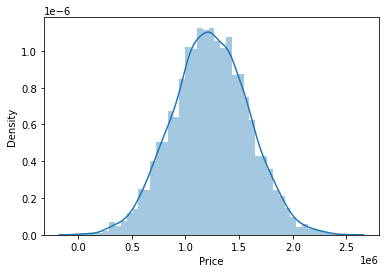

In [ ]:
sns.distplot(dataset['Price'])

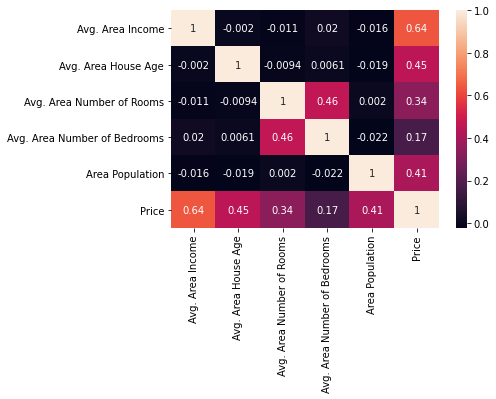

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
X = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = dataset['Price']

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(len(y_pred),1)
y_test=np.array(y_test).reshape(len(y_test),1)

In [ ]:
print(np.concatenate((y_pred,y_test),1)[:10])

[[ 971305.21715609  894251.06863578]
 [ 954717.19848531  932979.36062132]
 [ 907561.6278677   920747.91128789]
 [ 493251.3660301   691854.921027  ]
 [ 717846.54075547  732733.23629305]
 [1050147.83569698  945252.19180382]
 [ 712749.72523184  624482.76358665]
 [ 786730.40828344  849566.08554459]
 [1804401.07723593 1544379.74773568]
 [1538824.53251429 1535262.44079042]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


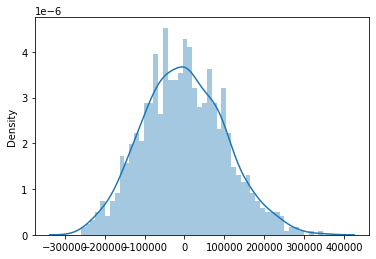

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9146454505137888

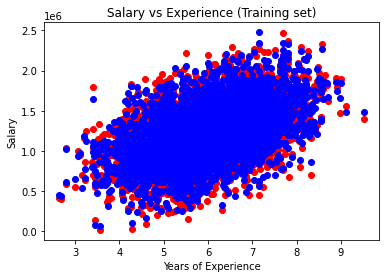

In [ ]:
plt.scatter(X_train['Avg. Area House Age'], y_train, color = 'red')
plt.scatter(X_train['Avg. Area House Age'], regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## The final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[2.16604083e+01 1.65809651e+05 1.20329408e+05 2.19309558e+03
 1.52858855e+01]
-2646630.5310569573


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
Avg. Area Income,21.660408
Avg. Area House Age,165809.651149
Avg. Area Number of Rooms,120329.407877
Avg. Area Number of Bedrooms,2193.095579
Area Population,15.285885


## Making a single prediction

In [ ]:
print(int(regressor.predict([[80000, 6, 7, 4, 24000]])))

##Model Selection

<b> 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
y_pred1 = regressor1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.9146454505137888

<b>2. Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X_train)
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)
y_pred2 = regressor2.predict(poly_reg.transform(X_test))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.9146454505138093

<b>3. Support Vector Regression(kernel=linear)

In [ ]:
from sklearn.svm import SVR
regressor3 = SVR(kernel = 'linear')
regressor3.fit(X_train, y_train)
y_pred3 = regressor3.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.5951197123138309

<b>4. Support Vector Regression(kernel=rbf)

In [ ]:
from sklearn.svm import SVR
regressor4 = SVR(kernel = 'rbf')
regressor4.fit(X_train, y_train)
y_pred4 = regressor4.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.0004227861838135283

<b>5. Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor5 = DecisionTreeRegressor(random_state = 0)
regressor5.fit(X_train, y_train)
y_pred5 = regressor5.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred5)

0.742990605643052

<b> 6. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor6 = RandomForestRegressor(n_estimators = 5, random_state = 0)
regressor6.fit(X_train, y_train)
y_pred6 = regressor6.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred6)

0.8460633132517077